In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn import svm
import numpy as np
from sklearn import tree
%matplotlib inline
%config IPCompleter.greedy=True

In [14]:
#http://www.agrometeo.ch/fr/meteorology/datas

dfoil = pd.read_csv("14-15-16-17_oil-consumption.txt", header=None, delim_whitespace=True, parse_dates=True)
dfoil[0] = pd.to_datetime(dfoil[0])
dfoil.columns = ["Date", "Value"]

dfhdd = pd.read_csv("LSGG_Heating_degree_days.TXT", skiprows=6)
dfhdd["Date"] = pd.to_datetime(dfhdd["Date"])

dfavgtemp = pd.read_csv("agrometeo-data.csv",skiprows=2,sep=";",encoding="latin_1")
dfavgtemp.columns = ["Date", "Avg"]
dfavgtemp["Date"] = pd.to_datetime(dfavgtemp["Date"])

dfavgray = pd.read_csv("agrometeo-data-rayonnement.csv",skiprows=2,sep=";",encoding="latin_1")
dfavgray.columns = ["Date", "Ray"]
dfavgray["Date"] = pd.to_datetime(dfavgray["Date"])

dfavgwind = pd.read_csv("agrometeo-data-vent.csv",skiprows=2,sep=";",encoding="latin_1")
dfavgwind.columns = ["Date", "Wind"]
dfavgwind["Date"] = pd.to_datetime(dfavgwind["Date"])

dfhouse = pd.read_csv("house.csv")
dfhouse["Date"] = pd.to_datetime(dfhouse["DateTime"])

dfmerged = pd.merge(dfoil, dfavgtemp, on = "Date")
dfmerged = pd.merge(dfmerged, dfavgray, on = "Date")
dfmerged = pd.merge(dfmerged, dfavgwind, on = "Date")
dfmergedhouse = pd.merge(dfmerged, dfhouse, on = "Date")

dfmerged.columns = ["Date", "Oil by day", "Temp by day", "Ray", "Wind"]

dfmergedhouse.columns

Index(['Date', 'Value', 'Avg', 'Ray', 'Wind', 'DateTime', 'Etage:Humidity',
       'Etage:Temperature', 'Etage:Temperature_min', 'Carnozet:Humidity',
       'Carnozet:Temperature', 'Carnozet:Temperature_min', 'Veranda:Humidity',
       'Veranda:Temperature', 'Veranda:Temperature_min',
       'Chambre Leif:Humidity', 'Chambre Leif:Temperature',
       'Chambre Leif:Temperature_min', 'Combles:Humidity',
       'Combles:Temperature', 'Combles:Temperature_min', 'Dehors:Humidity',
       'Dehors:Temperature', 'Dehors:Temperature_min', 'Salon:Humidity',
       'Salon:Temperature', 'Salon:Temperature_min', 'Rangement sud:Humidity',
       'Rangement sud:Temperature', 'Rangement sud:Temperature_min',
       'Rangement Nord:Humidity', 'Rangement Nord:Temperature',
       'Rangement Nord:Temperature_min', 'extra:Humidity', 'extra:Temperature',
       'extra:Temperature_min'],
      dtype='object')

0.95241099763570536

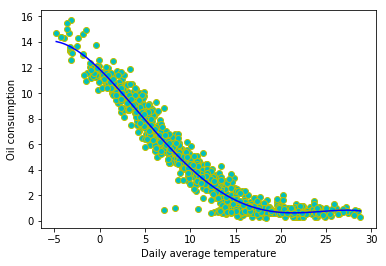

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dfmerged[["Temp by day"]], dfmerged["Oil by day"].values.reshape(-1, 1))

pipeline = make_pipeline(PolynomialFeatures(degree=4), linear_model.LinearRegression())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

x_plot = dfmerged[["Temp by day"]].sort_values(by = "Temp by day")
y_plot = pipeline.predict(x_plot)

plt.xlabel('Daily average temperature')
plt.ylabel('Oil consumption')
plt.scatter(dfmerged["Temp by day"],dfmerged["Oil by day"],color='c',edgecolor="y")
plt.plot(x_plot, y_plot,color='blue')
pipeline.score(X_test, y_test)

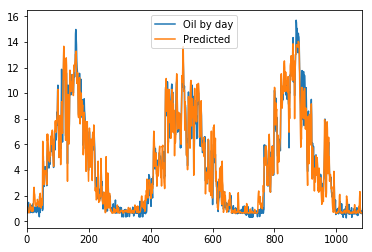

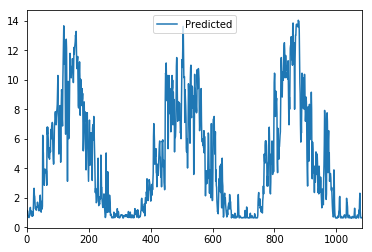

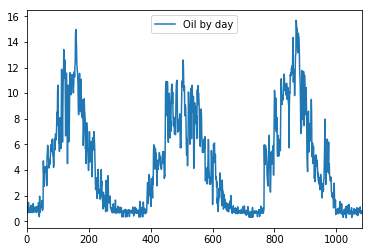

In [16]:
predicted = pipeline.predict(dfmerged[["Temp by day"]])

dfmerged["Predicted"] = predicted

dfmerged[["Date", "Oil by day", "Predicted"]].plot()
dfmerged[["Date", "Predicted"]].plot()
dfmerged[["Date", "Oil by day"]].plot()

